<a href="https://colab.research.google.com/github/Faiz-Hibatullah/machine-learning-1103210172/blob/main/5.%20Week%205/Netflix_EDA_and_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Langkah 1: Import Library dan Memuat Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Memastikan visualisasi tampil langsung pada notebook
%matplotlib inline

# Memuat dataset dari GitHub
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/05.%20Week%205/Datasets/netflix_titles.csv'
df = pd.read_csv(url)

# Menampilkan 5 baris pertama dataset
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# 1. Konversi 'date_added' ke format datetime dan membuat fitur baru: bulan dan tahun penambahan
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['added_month'] = df['date_added'].dt.month
df['added_year'] = df['date_added'].dt.year

# 2. Feature Engineering untuk kolom 'duration'
# Kita perlu mengekstrak durasi numerik dan satuan (min atau season)
def parse_duration(x):
    # Jika nilai NaN, kembalikan None
    if pd.isna(x):
        return None, None
    # Pisahkan durasi dan satuan, misal "90 min" atau "1 Season"
    parts = x.split()
    if len(parts) == 2:
        value = int(parts[0])
        unit = parts[1]
        return value, unit
    else:
        return None, None

df[['duration_int','duration_unit']] = df['duration'].apply(lambda x: pd.Series(parse_duration(x)))

# Tampilkan beberapa baris untuk verifikasi
df[['duration', 'duration_int', 'duration_unit']].head()


,duration,duration_int,duration_unit
0,90 min,90.0,min
1,2 Seasons,2.0,Seasons
2,1 Season,1.0,Season
3,1 Season,1.0,Season
4,2 Seasons,2.0,Seasons


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8807 non-null   object        
 1   type           8807 non-null   object        
 2   title          8807 non-null   object        
 3   director       6173 non-null   object        
 4   cast           7982 non-null   object        
 5   country        7976 non-null   object        
 6   date_added     8709 non-null   datetime64[ns]
 7   release_year   8807 non-null   int64         
 8   rating         8803 non-null   object        
 9   duration       8804 non-null   object        
 10  listed_in      8807 non-null   object        
 11  description    8807 non-null   object        
 12  added_month    8709 non-null   float64       
 13  added_year     8709 non-null   float64       
 14  duration_int   8804 non-null   float64       
 15  du

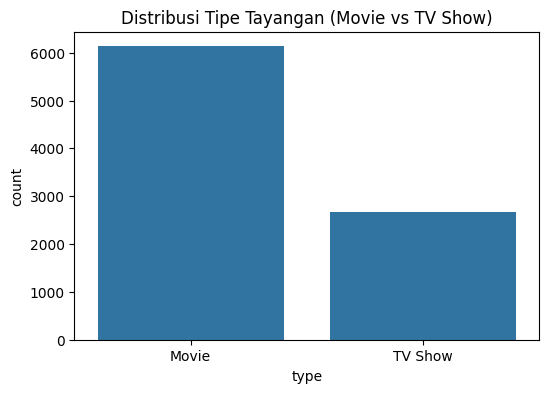

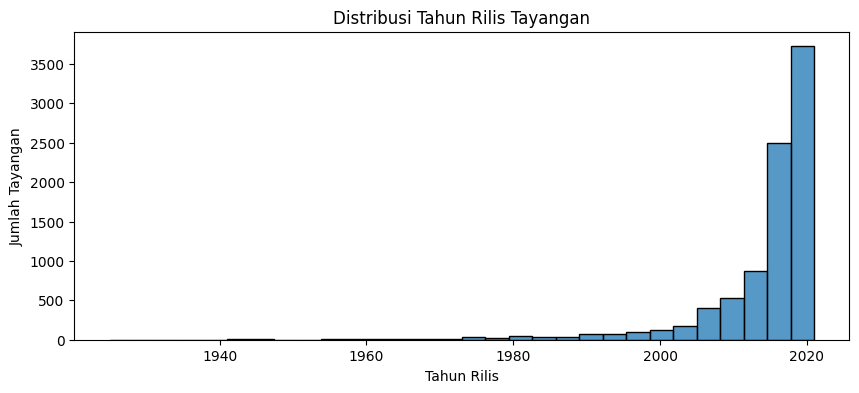

In [ ]:
# Informasi dataset
print("Informasi Dataset:")
df.info()

# Statistik deskriptif untuk kolom numerik (misal: release_year dan duration_int)
print("\nStatistik Deskriptif:")
print(df[['release_year', 'duration_int']].describe())

# Mendeteksi missing values
print("Jumlah nilai hilang pada setiap kolom:")
print(df.isna().sum())

# Distribusi kategori pada 'type'
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title("Distribusi Tipe Tayangan (Movie vs TV Show)")
plt.show()

# Distribusi data tahun rilis
plt.figure(figsize=(10,4))
sns.histplot(df['release_year'], bins=30, kde=False)
plt.title("Distribusi Tahun Rilis Tayangan")
plt.xlabel("Tahun Rilis")
plt.ylabel("Jumlah Tayangan")
plt.show()


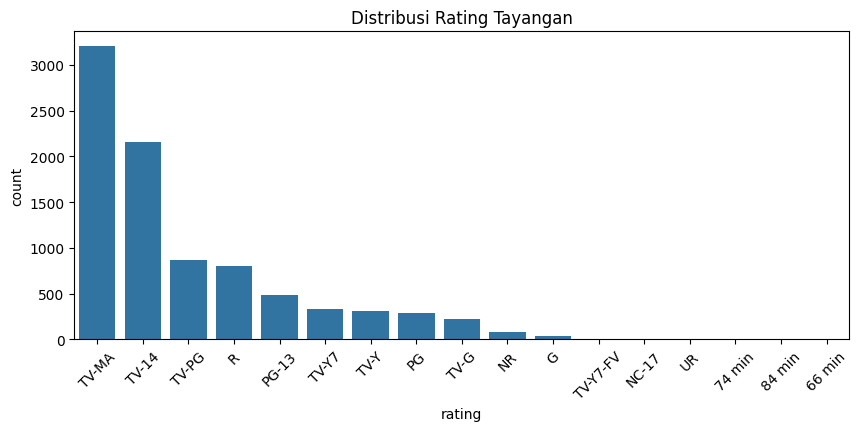

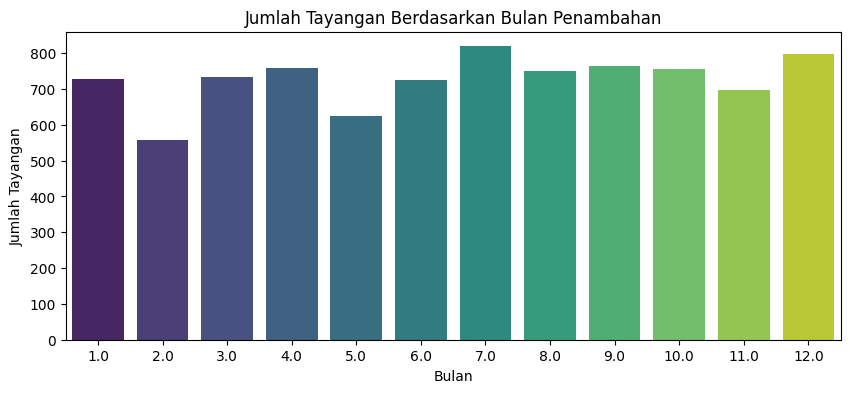

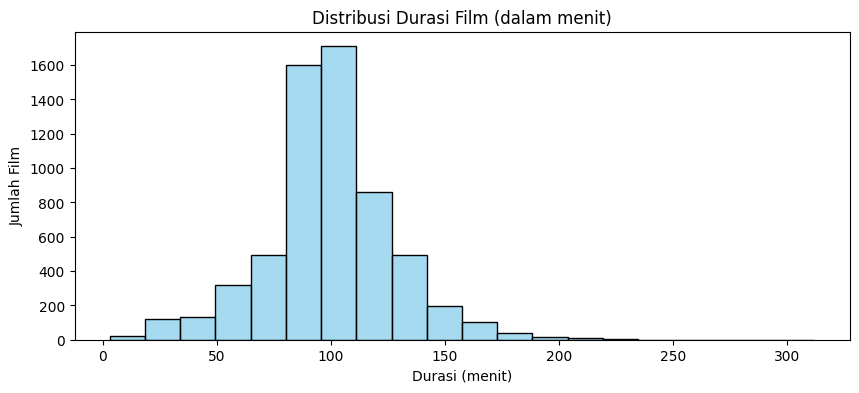

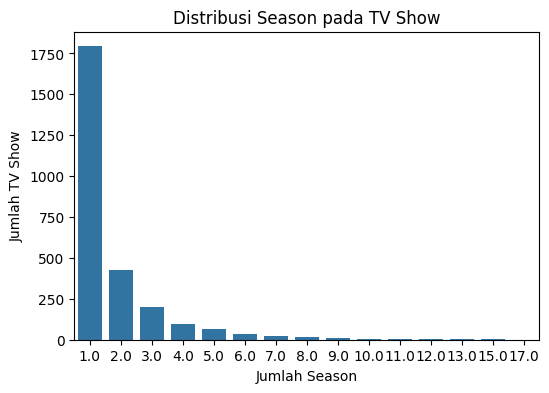

In [ ]:
# Visualisasi distribusi rating
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title("Distribusi Rating Tayangan")
plt.xticks(rotation=45)
plt.show()

# Visualisasi jumlah tayangan berdasarkan bulan penambahan
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='added_month', palette="viridis")
plt.title("Jumlah Tayangan Berdasarkan Bulan Penambahan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Tayangan")
plt.show()

# Visualisasi durasi untuk Movie (dalam menit)
plt.figure(figsize=(10,4))
sns.histplot(df[df['type'] == 'Movie']['duration_int'].dropna(), bins=20, kde=False, color='skyblue')
plt.title("Distribusi Durasi Film (dalam menit)")
plt.xlabel("Durasi (menit)")
plt.ylabel("Jumlah Film")
plt.show()

# Visualisasi season untuk TV Show
plt.figure(figsize=(6,4))
sns.countplot(x='duration_int', data=df[df['type'] == 'TV Show'])
plt.title("Distribusi Season pada TV Show")
plt.xlabel("Jumlah Season")
plt.ylabel("Jumlah TV Show")
plt.show()


### Mean (Rata-Rata)
The mean is calculated as follows:
$$
\text{mean} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$
**Penjelasan:** Rata-rata dihitung dengan menjumlahkan semua nilai data dan membaginya dengan jumlah data $( n )$.

### Variance (Variansi)
The variance is calculated using the formula:
$$
\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} \left(x_i - \text{mean}\right)^2
$$
**Penjelasan:** Variansi mengukur seberapa jauh nilai-nilai data tersebar dari rata-rata. Nilai yang lebih tinggi menunjukkan penyebaran data yang lebih besar.

### Standard Deviation (Simpangan Baku)
The standard deviation is computed as:
$$
\sigma = \sqrt{\sigma^2}
$$
**Penjelasan:** Simpangan baku adalah akar kuadrat dari variansi dan memberikan ukuran sebaran data dalam satuan yang sama dengan data aslinya.